# Forest fragment change
Input: 
- Forest4model_v1_Forest_fragment_change

Aim:
- Visualising the changes in forest fragmentation in sample countries
- Differentiating forest fragmentation data to 10 bin classes (fraction data is ranging from 0 to 1)
- Calculating the percentage share of area with a recorded decrease in forest fragmentation over forest cover (more connectivity in forest cover)
- Calculating the percentage share of area with a recorded increase in forest fragmentation over forest cover
- Calculating percentage share of each class of fragmentation change over country's total forest cover

Output:
- A dataframe containing the percentage share of area with increased fragmentation (less forest connectivity) and decreased fragmentation
- As well as the classes of fragmentation change in 32 EU countries

In [1]:
# Vector data
import geopandas as gpd

# Tabular data 
import pandas as pd
import numpy as np

# Raster array
import xarray as xr

# Plotting
import matplotlib.pyplot as plt

# System
from pathlib import Path

# Import functions from geo_tools module
import sys
from geo_tools import forest_barplot, plot_iso_forest, calculate_stats

# Supress warnings on df.loc
import warnings
warnings.filterwarnings('ignore')

# Reloads module
%load_ext autoreload
%autoreload 2

# Output directory

In [2]:
# Specify the desired output folder path for processed dataset
output_data_dir = Path.cwd() / ".." / "output_data"

# Check if the output folder exists, and create if not
Path.mkdir(output_data_dir, exist_ok=True, parents=True)

In [3]:
# Specify the desired output folder path for figures
output_figure_dir = Path.cwd() / ".." / "output_figures"

# Check if the output folder exists, and create if not
Path.mkdir(output_figure_dir, exist_ok=True, parents=True)

# A list of ISO3 codes of EU countries

In [4]:
eu_iso3 = pd.read_csv(output_data_dir/"Country_Codes_and_Names_ISO3.csv")

eu_iso = eu_iso3["ISO3"]

# Plotting data distribution
- A minus sign represents a decrease in forest fragmenation. This means that there is an increase in forest connectivity

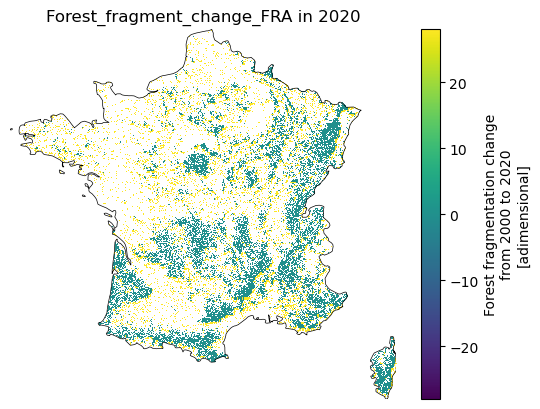

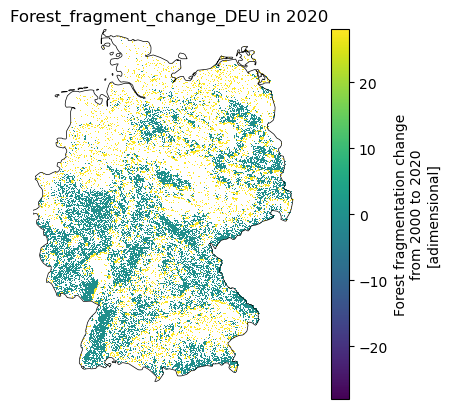

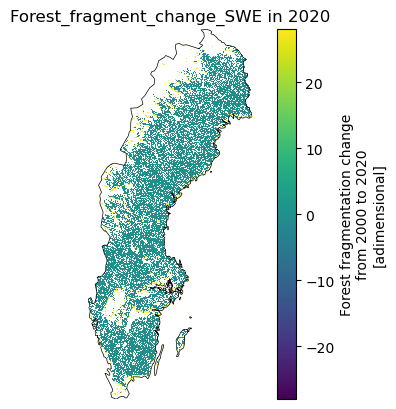

In [7]:
# Testing plot_iso_forest for many countries at once
for iso in ["FRA", "DEU", "SWE"]:
    plot_iso_forest.plot_fragment_change(
        iso_code=iso,
        xarray_id="Forest_fragment_change"
    )

# Calculating area for the increase in fragmentation

In [5]:
%%time

# Template to store increase in fragmentation in Mha
fragment_increase_mha = []

for iso in eu_iso:

    # Calculate area
    iso_fragment_increase = calculate_stats.agg_fragment_change_area(
        iso_code=iso,
        xarray_id="Forest_fragment_change",
        forest_layer_year=2020,
        calculate_for="increase"
    )

    fragment_increase_mha.append(iso_fragment_increase)
    
fragment_increase_mha_df = pd.concat(fragment_increase_mha)

CPU times: user 49.1 s, sys: 9.75 s, total: 58.9 s
Wall time: 58.9 s


In [6]:
fragment_increase_mha_df

,Region,Variable,Var_uid,Year,Unit,Value
0,BGR,Forest fragment increase,forest_fragment_increase,2020,Million hectares,2.465450e-04
0,CYP,Forest fragment increase,forest_fragment_increase,2020,Million hectares,0.000000e+00
0,DNK,Forest fragment increase,forest_fragment_increase,2020,Million hectares,4.624899e-05
0,IRL,Forest fragment increase,forest_fragment_increase,2020,Million hectares,9.000001e-08
0,EST,Forest fragment increase,forest_fragment_increase,2020,Million hectares,1.455359e-02
0,AUT,Forest fragment increase,forest_fragment_increase,2020,Million hectares,3.705616e-02
0,CZE,Forest fragment increase,forest_fragment_increase,2020,Million hectares,2.571015e-02
0,FIN,Forest fragment increase,forest_fragment_increase,2020,Million hectares,6.200777e-02
0,FRA,Forest fragment increase,forest_fragment_increase,2020,Million hectares,1.842947e-02
0,DEU,Forest fragment increase,forest_fragment_increase,2020,Million hectares,7.201162e-02


In [9]:
# Percentage forest cover experiencing an increase in fragmentation

# Template to store total area in percentage share
fragment_increase_perc = []

# Import forest cover data
forest_cover = pd.read_csv(output_data_dir/"iso_forest_cover_stats.csv").drop(["Unnamed: 0"], axis=1)

for iso in eu_iso:
    
    # Get forest cover area within the country
    iso_forest_cover = forest_cover.loc[forest_cover.Region == iso]
    value_to_copy = iso_forest_cover.iloc[0, 5]

    # Get fragment increase within the country
    iso_fragment_inc = fragment_increase_mha_df.loc[fragment_increase_mha_df.Region == iso]

    # Copy forest cover to iso_fraction_class
    iso_fragment_inc[f"{iso}_forest_cover_Mha"] = value_to_copy

    # Calculate percentage share of fraction classes over total forest cover
    iso_fragment_inc["Percentage share"] = iso_fragment_inc["Value"] / iso_fragment_inc[f"{iso}_forest_cover_Mha"]

    # Creating final dataset
    iso_fragment_inc_perc = iso_fragment_inc.drop(["Unit", "Value", f"{iso}_forest_cover_Mha"], axis=1)

    iso_fragment_inc_perc.insert(
        loc=3,
        column="Unit",
        value="Percentage share"
    )

    iso_fragment_inc_perc.rename(
        columns={"Percentage share" : "Value"},
        inplace=True
    )   

    fragment_increase_perc.append(iso_fragment_inc_perc)

fragment_inc_perc_df = pd.concat(fragment_increase_perc)

In [71]:
fragment_inc_perc_df

,Region,Variable,Var_uid,Unit,Year,Value
0,BGR,Forest fragment increase,forest_fragment_increase,Percentage share,2020,8.935599e-05
0,CYP,Forest fragment increase,forest_fragment_increase,Percentage share,2020,0.000000e+00
0,DNK,Forest fragment increase,forest_fragment_increase,Percentage share,2020,1.104828e-04
0,IRL,Forest fragment increase,forest_fragment_increase,Percentage share,2020,2.076005e-07
0,EST,Forest fragment increase,forest_fragment_increase,Percentage share,2020,6.544557e-03
0,AUT,Forest fragment increase,forest_fragment_increase,Percentage share,2020,1.313738e-02
0,CZE,Forest fragment increase,forest_fragment_increase,Percentage share,2020,1.144592e-02
0,FIN,Forest fragment increase,forest_fragment_increase,Percentage share,2020,2.679178e-03
0,FRA,Forest fragment increase,forest_fragment_increase,Percentage share,2020,1.632628e-03
0,DEU,Forest fragment increase,forest_fragment_increase,Percentage share,2020,7.783909e-03


In [73]:
# Export the processed data
fragment_increase_df = pd.concat([fragment_increase_mha_df, fragment_inc_perc_df])

fragment_increase_df.to_csv(output_data_dir/"iso_forest_fragment_increase.csv")

# Calculating area for the decrase in fragmentation

In [74]:
%%time

# Template to store increase in fragmentation in Mha
fragment_decrease_mha = []

for iso in eu_iso:

    # Calculate area
    iso_fragment_decrease = calculate_stats.agg_fragment_change_area(
        iso_code=iso,
        xarray_id="Forest_fragment_change",
        forest_layer_year=2020,
        calculate_for="decrease"
    )

    fragment_decrease_mha.append(iso_fragment_decrease)
    
fragment_decrease_mha_df = pd.concat(fragment_decrease_mha)

CPU times: user 42.8 s, sys: 7.34 s, total: 50.2 s
Wall time: 50.2 s


In [75]:
fragment_decrease_mha_df

,Region,Variable,Var_uid,Year,Unit,Value
0,BGR,Forest fragment decrease,forest_fragment_decrease,2020,Million hectares,-0.132279
0,CYP,Forest fragment decrease,forest_fragment_decrease,2020,Million hectares,-0.001616
0,DNK,Forest fragment decrease,forest_fragment_decrease,2020,Million hectares,-0.000283
0,IRL,Forest fragment decrease,forest_fragment_decrease,2020,Million hectares,-0.002000
0,EST,Forest fragment decrease,forest_fragment_decrease,2020,Million hectares,-0.015508
0,AUT,Forest fragment decrease,forest_fragment_decrease,2020,Million hectares,-0.003469
0,CZE,Forest fragment decrease,forest_fragment_decrease,2020,Million hectares,-0.017030
0,FIN,Forest fragment decrease,forest_fragment_decrease,2020,Million hectares,-0.637300
0,FRA,Forest fragment decrease,forest_fragment_decrease,2020,Million hectares,-0.181940
0,DEU,Forest fragment decrease,forest_fragment_decrease,2020,Million hectares,-0.074164


In [76]:
# Percentage forest cover experiencing an decrease in fragmentation

# Template to store total area in percentage share
fragment_decrease_perc = []

# Import forest cover data
forest_cover = pd.read_csv(output_data_dir/"iso_forest_cover_stats.csv").drop(["Unnamed: 0"], axis=1)

for iso in eu_iso:
    
    # Get forest cover area within the country
    iso_forest_cover = forest_cover.loc[forest_cover.Region == iso]
    value_to_copy = iso_forest_cover.iloc[0, 5]

    # Get fragment decrease within the country
    iso_fragment_dec = fragment_decrease_mha_df.loc[fragment_decrease_mha_df.Region == iso]

    # Copy forest cover to iso_fraction_class
    iso_fragment_dec[f"{iso}_forest_cover_Mha"] = value_to_copy

    # Calculate percentage share of fraction classes over total forest cover
    iso_fragment_dec["Percentage share"] = iso_fragment_dec["Value"] / iso_fragment_dec[f"{iso}_forest_cover_Mha"]

    # Creating final dataset
    iso_fragment_dec_perc = iso_fragment_dec.drop(["Unit", "Value", f"{iso}_forest_cover_Mha"], axis=1)

    iso_fragment_dec_perc.insert(
        loc=3,
        column="Unit",
        value="Percentage share"
    )

    iso_fragment_dec_perc.rename(
        columns={"Percentage share" : "Value"},
        inplace=True
    )   

    fragment_decrease_perc.append(iso_fragment_dec_perc)

fragment_dec_perc_df = pd.concat(fragment_decrease_perc)

In [77]:
fragment_dec_perc_df

,Region,Variable,Var_uid,Unit,Year,Value
0,BGR,Forest fragment decrease,forest_fragment_decrease,Percentage share,2020,-0.047942
0,CYP,Forest fragment decrease,forest_fragment_decrease,Percentage share,2020,-0.020214
0,DNK,Forest fragment decrease,forest_fragment_decrease,Percentage share,2020,-0.000676
0,IRL,Forest fragment decrease,forest_fragment_decrease,Percentage share,2020,-0.004613
0,EST,Forest fragment decrease,forest_fragment_decrease,Percentage share,2020,-0.006974
0,AUT,Forest fragment decrease,forest_fragment_decrease,Percentage share,2020,-0.001230
0,CZE,Forest fragment decrease,forest_fragment_decrease,Percentage share,2020,-0.007581
0,FIN,Forest fragment decrease,forest_fragment_decrease,Percentage share,2020,-0.027536
0,FRA,Forest fragment decrease,forest_fragment_decrease,Percentage share,2020,-0.016118
0,DEU,Forest fragment decrease,forest_fragment_decrease,Percentage share,2020,-0.008017


In [81]:
# Export the processed data
fragment_decrease_df = pd.concat([fragment_decrease_mha_df, fragment_dec_perc_df])

fragment_decrease_df.to_csv(output_data_dir/"iso_forest_fragment_decrease.csv")